In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
# X,y = make_classification(n_features=1005, n_redundant=0, n_informative=500,n_clusters_per_class=1)
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = df.drop(['Purchased', 'User ID', 'Gender'], axis='columns')
y = df['Purchased']
print(X.shape)
X.head()

(400, 2)


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

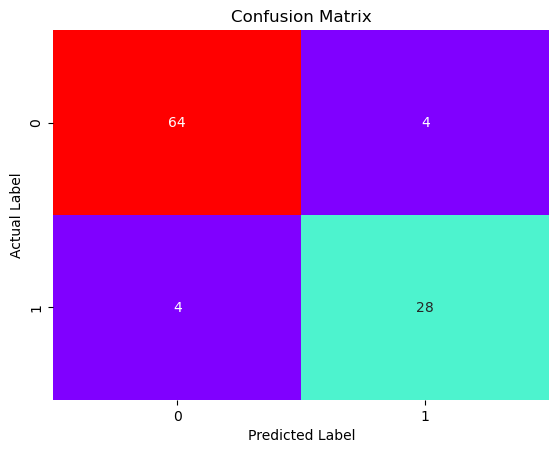

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Possible Hyperparamters to tune : 
1. max_depth
2. min_sample_split
3. max_leaf_nodes
4. min_samples_leaf
5. n_estimators
6. max_sample (bootstrap sample)
7. max_features 

# Max depth

In [25]:
rf_max_depth_1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_max_depth_2 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rf_max_depth_3 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
rf_max_depth_4 = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)
rf_max_depth_5 = RandomForestClassifier(n_estimators = 800, criterion = 'entropy', random_state = 0)

In [26]:
rf_max_depth_1.fit(X_train,y_train)
rf_max_depth_2.fit(X_train,y_train)
rf_max_depth_3.fit(X_train,y_train)
rf_max_depth_4.fit(X_train,y_train)
rf_max_depth_5.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=800, random_state=0)

In [27]:
y_predited_1 = rf_max_depth_1.predict(X_test)
y_predited_2 = rf_max_depth_2.predict(X_test)
y_predited_3 = rf_max_depth_3.predict(X_test)
y_predited_4 = rf_max_depth_4.predict(X_test)
y_predited_5 = rf_max_depth_5.predict(X_test)

In [28]:
rmse = [mean_squared_error(y_test, y_predited_1),mean_squared_error(y_test, y_predited_2),mean_squared_error(y_test, y_predited_3),mean_squared_error(y_test, y_predited_4),mean_squared_error(y_test, y_predited_5)]
max_depth = [100,200,300,400,800]

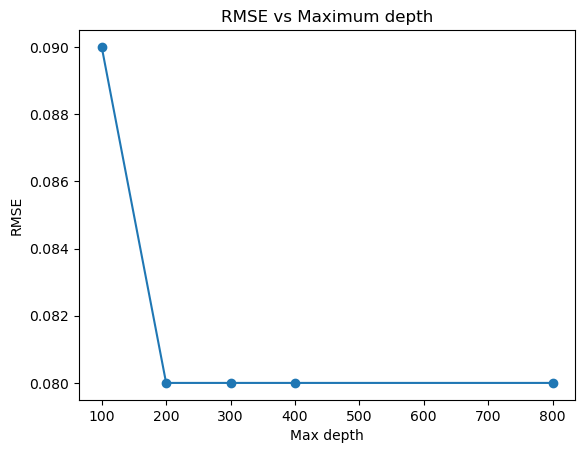

In [31]:
plt.plot(max_depth,rmse,'o-')
plt.xlabel('Max depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Maximum depth')
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

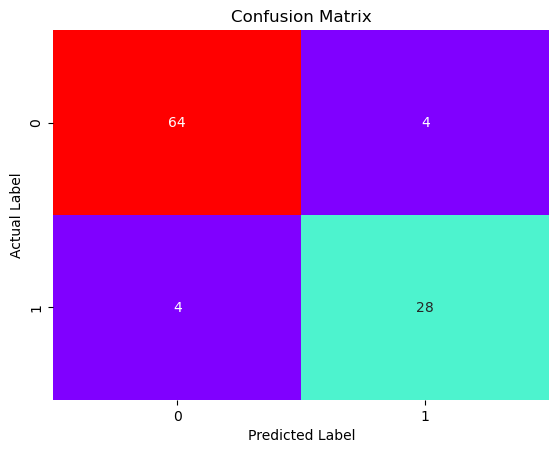

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

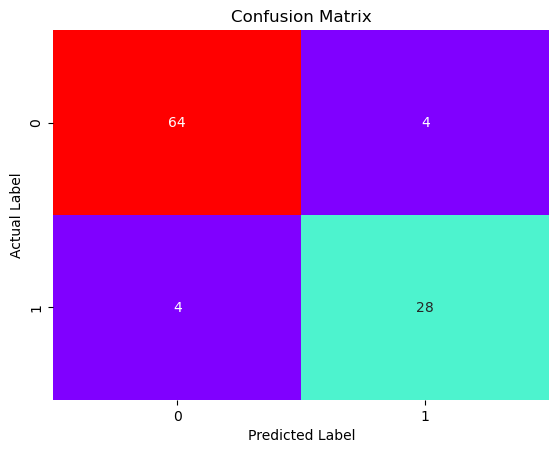

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

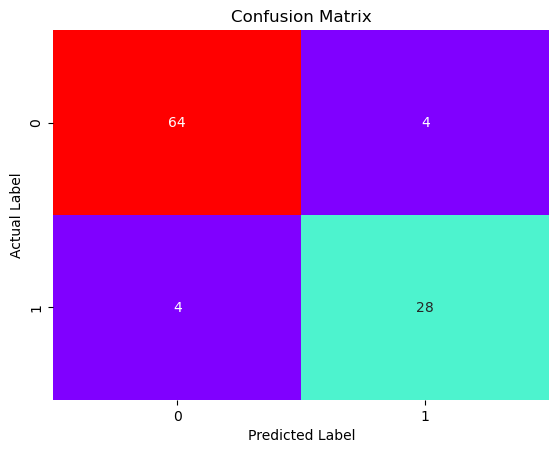

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

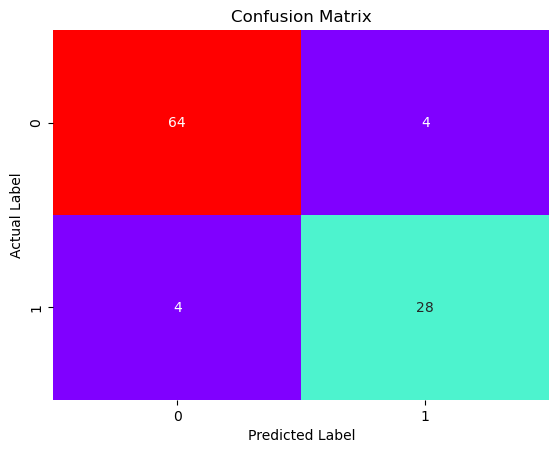

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [6]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
y_predited = rf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_predited)

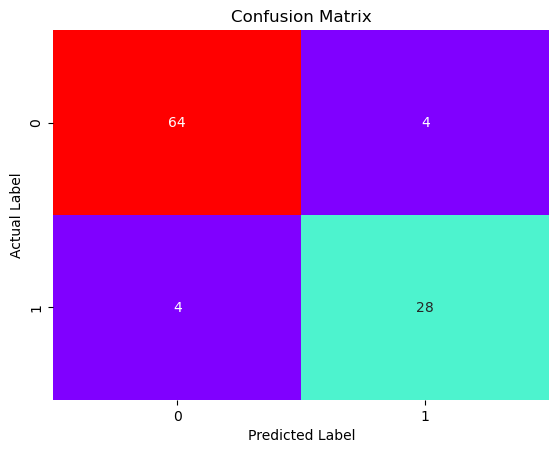

In [9]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()